In [1]:
from itertools import product
import gurobipy as gp
from gurobipy import GRB
import pandas as pd

In [2]:
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
df = pd.read_excel('default of credit card clients.xls')
new_header = df.iloc[0] #grab the first row for the header
length = 1000
df = df[1:length] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.rename(columns = {'default payment next month':'DPNM'}, inplace = True)
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DPNM
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
df.dtypes

0
ID           object
LIMIT_BAL    object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_0        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1    object
BILL_AMT2    object
BILL_AMT3    object
BILL_AMT4    object
BILL_AMT5    object
BILL_AMT6    object
PAY_AMT1     object
PAY_AMT2     object
PAY_AMT3     object
PAY_AMT4     object
PAY_AMT5     object
PAY_AMT6     object
DPNM         object
dtype: object

In [4]:
 for column in df.columns:
    df[column] = df[column].astype(str).astype(int)

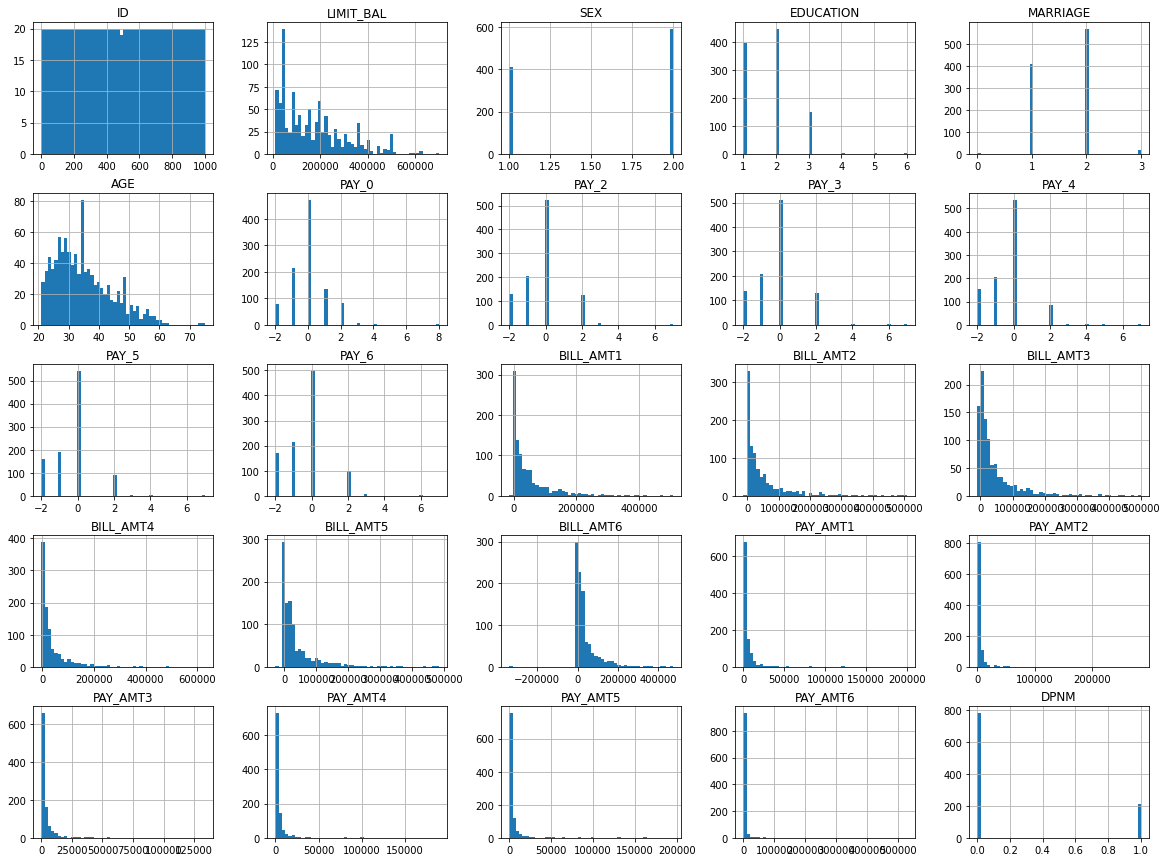

In [5]:
# Matplotlib comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15))
plt.show()

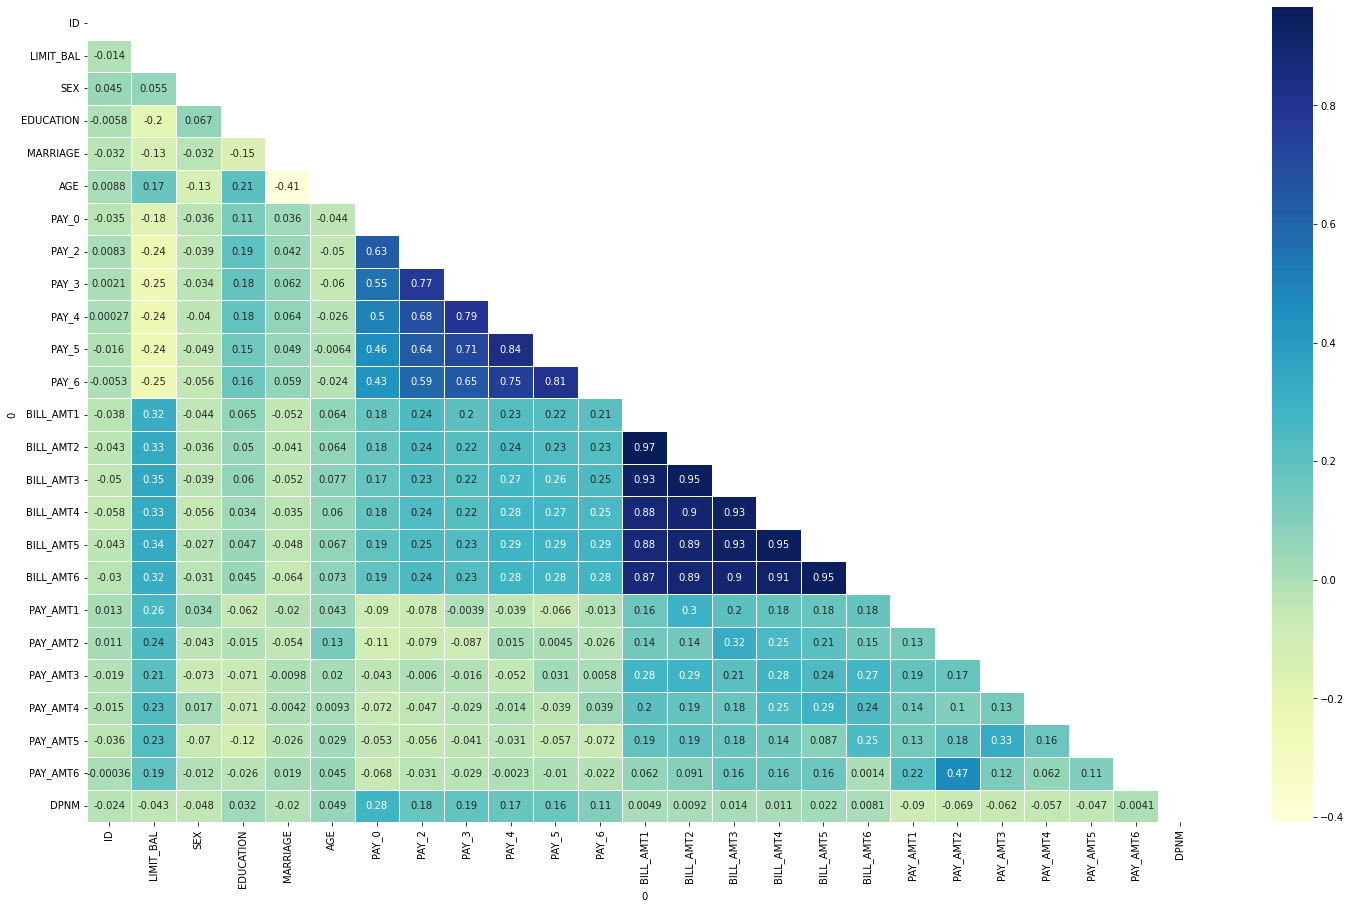

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

corr = df.corr() # df.corr() Compute pairwise correlation of columns, excluding NA/null values.
plt.subplots(1,1,figsize=(25,15))
# # Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# sns.heatmap() Plot rectangular data as a color-encoded matrix.
# sns.heatmap(curr, annot=True,linewidths=1,cmap="YlGnBu")
sns.heatmap(corr, annot=True, mask = mask,linewidths=1,cmap="YlGnBu")
plt.show()

In [7]:
df.iloc[ :10, 12:-1]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,3913,3102,689,0,0,0,0,689,0,0,0,0
2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
6,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
7,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
8,11876,380,601,221,-159,567,380,601,0,581,1687,1542
9,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000
10,0,0,0,0,13007,13912,0,0,0,13007,1122,0


In [8]:
df = df.loc[~(df.iloc[ :, 12:24]==0).all(axis=1)]
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DPNM
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,993,80000,2,2,2,27,0,0,0,0,...,61077,62394,63655,2200,2200,2200,2300,2300,2600,0
994,994,360000,2,1,2,25,0,0,0,0,...,12800,0,0,7004,1793,2757,0,0,0,1
996,996,200000,1,1,2,39,-2,-2,-2,-2,...,0,60800,0,0,0,200,60800,0,0,0
997,997,140000,1,1,1,45,0,0,0,0,...,44452,45433,46383,1600,1600,3169,1700,1700,1495,0


In [9]:
print("\n".join("{} - min: {} max: {}".format(i, x,y) for i, x, y in zip(df.min().index, df.min(), df.max())))

ID - min: 1 max: 999
LIMIT_BAL - min: 10000 max: 700000
SEX - min: 1 max: 2
EDUCATION - min: 1 max: 6
MARRIAGE - min: 0 max: 3
AGE - min: 21 max: 75
PAY_0 - min: -2 max: 8
PAY_2 - min: -2 max: 7
PAY_3 - min: -2 max: 7
PAY_4 - min: -2 max: 7
PAY_5 - min: -2 max: 7
PAY_6 - min: -2 max: 7
BILL_AMT1 - min: -14386 max: 507726
BILL_AMT2 - min: -13543 max: 509229
BILL_AMT3 - min: -9850 max: 499936
BILL_AMT4 - min: -3684 max: 628699
BILL_AMT5 - min: -28335 max: 484612
BILL_AMT6 - min: -339603 max: 473944
PAY_AMT1 - min: 0 max: 199646
PAY_AMT2 - min: 0 max: 285138
PAY_AMT3 - min: 0 max: 133657
PAY_AMT4 - min: 0 max: 188840
PAY_AMT5 - min: 0 max: 195599
PAY_AMT6 - min: 0 max: 528666
DPNM - min: 0 max: 1


In [10]:
# # To avoid non-positive values. Some constants have been added to the inputs and outputs. 
#I'll look at the literature to see how this alteration might change the analyses.

# Some papers that may be able to help us:
# A two-phase approach for setting targets in DEA with negative data
# A generalized DEA model for inputs/outputs estimation
# VARIABLES WITH NEGATIVE VALUES IN DEA

for column in ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
    df[column] = df[column].apply(lambda x: x+3)

bills = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pays = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for c1,c2 in zip(bills, pays):
    df['DEBT' + c1[4:]] = (df[c2] - df[c1]).apply(lambda x : -x if x<0 else 0)
    df['CREDIT' + c1[4:]] = (df[c2] - df[c1]).apply(lambda x : x if x>0 else 0)

In [11]:
df.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,DEBT_AMT2,CREDIT_AMT2,DEBT_AMT3,CREDIT_AMT3,DEBT_AMT4,CREDIT_AMT4,DEBT_AMT5,CREDIT_AMT5,DEBT_AMT6,CREDIT_AMT6
1,1,20000,2,2,1,24,5,5,2,2,...,2413,0,689,0,0,0,0,0,0,0
2,2,120000,2,2,2,26,2,5,3,3,...,725,0,1682,0,2272,0,3455,0,1261,0
3,3,90000,2,2,2,34,3,3,3,3,...,12527,0,12559,0,13331,0,13948,0,10549,0
4,4,50000,2,2,1,37,3,3,3,3,...,46214,0,48091,0,27214,0,27890,0,28547,0
5,5,50000,1,2,1,57,2,3,2,3,...,0,31011,25835,0,11940,0,18457,0,18452,0
6,6,50000,1,1,2,37,3,3,3,3,...,55254,0,56951,0,18394,0,18619,0,19224,0
7,7,500000,1,1,2,29,3,3,3,3,...,372023,0,407007,0,522414,0,469253,0,460174,0
8,8,100000,2,2,2,23,3,2,2,3,...,0,221,601,0,0,360,0,1846,0,975
9,9,140000,2,3,1,28,3,3,5,3,...,14096,0,11676,0,11211,0,10793,0,2719,0
10,10,20000,1,3,2,35,1,1,1,1,...,0,0,0,0,0,13007,11885,0,13912,0


In [12]:
inattr = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','DPNM','DEBT_AMT1','DEBT_AMT2','DEBT_AMT3','DEBT_AMT4','DEBT_AMT5','DEBT_AMT6']
outattr = ['CREDIT_AMT1','CREDIT_AMT2','CREDIT_AMT3','CREDIT_AMT4','CREDIT_AMT5','CREDIT_AMT6']

inputs = df[['ID'] + inattr].set_index('ID').T.to_dict()
outputs = df[['ID'] + outattr].set_index('ID').T.to_dict()
dmus = df['ID'].to_list()

In [13]:
print(inputs[78])
print(outputs[78])
print(dmus[:10])

{'PAY_0': 2, 'PAY_2': 2, 'PAY_3': 2, 'PAY_4': 2, 'PAY_5': 2, 'PAY_6': 2, 'DPNM': 0, 'DEBT_AMT1': 0, 'DEBT_AMT2': 0, 'DEBT_AMT3': 0, 'DEBT_AMT4': 0, 'DEBT_AMT5': 0, 'DEBT_AMT6': 0}
{'CREDIT_AMT1': 0, 'CREDIT_AMT2': 0, 'CREDIT_AMT3': 0, 'CREDIT_AMT4': 0, 'CREDIT_AMT5': 0, 'CREDIT_AMT6': 0}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [14]:
performance = {}
for target in dmus:
    ### Create LP model
    model = gp.Model('DEA')

    # Decision variables
    wout = model.addVars(outattr, name="outputWeight")
    win = model.addVars(inattr, name="inputWeight")

    # Constraints
    ratios = model.addConstrs( ( gp.quicksum(outputs[h][r]*wout[r] for r in outattr ) 
                                - gp.quicksum(inputs[h][i]*win[i] for i in inattr ) 
                                <= 0 for h in dmus ), name='ratios' )



    normalization = model.addConstr((gp.quicksum(inputs[target][i]*win[i] for i in inattr ) == 1 ),
                                    name='normalization')

    # Objective function
    model.setObjective(gp.quicksum(outputs[target][r]*wout[r] for r in outattr ), GRB.MAXIMIZE)

    model.params.OutputFlag = 0
    model.optimize()

    # Print results
    performance[target] = model.objVal
    print(f"\nThe efficiency of target DMU {target} is {round(model.objVal,3)}") 

    print("__________________________________________________________________")
    print(f"The weights for the inputs are:")
    for i in inattr:
        print(f"For {i}: {round(win[i].x,3)} ") 

    print("__________________________________________________________________")
    print(f"The weights for the outputs are")
    for r in outattr:
        print(f"For {r} is: {round(wout[r].x,3)} ") 
    print("__________________________________________________________________\n\n") 

Restricted license - for non-production use only - expires 2023-10-25

The efficiency of target DMU 1 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 2 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPN


The efficiency of target DMU 13 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 14 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.25 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 


The efficiency of target DMU 27 is 0.294
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.451 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.134 
For DEBT_AMT3: 0.002 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 28 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AM


The efficiency of target DMU 39 is 0.281
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.601 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.001 
For DEBT_AMT3: 0.002 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.001 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 40 is 0.651
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.139 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT


The efficiency of target DMU 52 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 53 is 0.305
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.34 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0


The efficiency of target DMU 64 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 65 is 0.953
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.017 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 1.107 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.001 
For DEBT_AM


The efficiency of target DMU 76 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 77 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0


The efficiency of target DMU 89 is 0.418
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.031 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.218 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 90 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 101 is 0.68
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.31 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 102 is 0.746
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.322 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.856 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT


The efficiency of target DMU 114 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 115 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 129 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 130 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.167 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 142 is 0.132
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.072 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 13.566 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.001 
For DEBT_AMT3: 0.002 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.006 
For DEBT_AMT6: 0.001 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.001 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 143 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.25 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
F


The efficiency of target DMU 154 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 155 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 166 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 167 is 0.936
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.438 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3


The efficiency of target DMU 178 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.25 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 179 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 190 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.25 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 191 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 202 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 203 is 0.414
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.042 
For PAY_2: 0.0 
For PAY_3: 0.128 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 2.372 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_


The efficiency of target DMU 214 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 215 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0


The efficiency of target DMU 226 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 227 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0


The efficiency of target DMU 238 is 0.896
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.4 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.226 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 239 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3


The efficiency of target DMU 250 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 251 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.25 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 262 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 263 is 0.842
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.461 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.803 
For DEBT_AMT1: 0.661 
For DEBT_AMT2: 0.0 
For DEBT_


The efficiency of target DMU 276 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 277 is 0.538
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.059 
For PAY_6: 0.0 
For DPNM: 0.13 
For DEBT_AMT1: 0.034 
For DEBT_AMT2: 0.0 
For DEBT_A


The efficiency of target DMU 288 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 289 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0


The efficiency of target DMU 301 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 302 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 1.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.


The efficiency of target DMU 314 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 315 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0


The efficiency of target DMU 326 is 0.478
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.735 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 327 is 0.216
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.082 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT


The efficiency of target DMU 338 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 1.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 339 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0


The efficiency of target DMU 350 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 351 is 0.071
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.0 
For PAY_3: 0.5 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 363 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.143 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 364 is 0.056
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.006 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.001 
For DEBT_AMT2: 0.0 
For DEBT_AM


The efficiency of target DMU 376 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 377 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.25 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 388 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 389 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0


The efficiency of target DMU 401 is 0.482
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.5 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 402 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 413 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.009 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.3 
For DEBT_AMT1: 0.001 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.006 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 414 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.25 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT


The efficiency of target DMU 426 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 427 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0


The efficiency of target DMU 438 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 439 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 450 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 452 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0


The efficiency of target DMU 463 is 0.783
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.149 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 464 is 0.65
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.028 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.032 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AM


The efficiency of target DMU 475 is 0.81
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.031 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.227 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.001 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 476 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_A


The efficiency of target DMU 488 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 489 is 0.164
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.091 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3


The efficiency of target DMU 500 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 501 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 513 is 0.592
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.122 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 514 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 525 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 526 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 3.547 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 537 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 538 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 550 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 551 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 562 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.025 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 2.077 
For DEBT_AMT1: 0.002 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.007 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.001 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.001 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 563 is 0.18
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.21 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DE


The efficiency of target DMU 574 is 0.389
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.34 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 575 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.008 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.515 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3


The efficiency of target DMU 586 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 588 is 0.428
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.175 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3


The efficiency of target DMU 600 is 0.687
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.374 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 601 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3


The efficiency of target DMU 612 is 0.016
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.0 
For PAY_3: 1.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 613 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 624 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.25 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 181.44 
For DEBT_AMT1: 0.031 
For DEBT_AMT2: 0.003 
For DEBT_AMT3: 0.003 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 625 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_


The efficiency of target DMU 637 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 638 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 649 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 650 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.091 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0


The efficiency of target DMU 661 is 0.79
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.102 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.003 
For DEBT_AMT4: 0.001 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 662 is 0.262
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.051 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.116 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEB


The efficiency of target DMU 673 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 674 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0


The efficiency of target DMU 685 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 686 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.333 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 698 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 699 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 1.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 


The efficiency of target DMU 710 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 711 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 723 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.008 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.253 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.194 
For DEBT_AMT3: 0.002 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.001 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 724 is 0.619
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.198 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DE


The efficiency of target DMU 735 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 736 is 0.602
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.529 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 1.156 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AM


The efficiency of target DMU 747 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 748 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 759 is 0.193
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.5 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 760 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 771 is 0.36
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.494 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 772 is 0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.5 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.


The efficiency of target DMU 783 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 784 is 0.082
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 1.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.002 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 


The efficiency of target DMU 795 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 796 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 808 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 809 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 820 is 0.244
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.23 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.706 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 821 is 0.932
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.246 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 48.222 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT


The efficiency of target DMU 832 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.091 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 833 is 0.784
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.267 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3


The efficiency of target DMU 845 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 846 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.022 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.814 
For DEBT_AMT1: 0.001 
For DEBT_AMT2: 0.0 
For DEBT_AM


The efficiency of target DMU 860 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 862 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.393 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 1.225 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3


The efficiency of target DMU 873 is 0.793
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.0 
For PAY_2: 0.042 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 2.22 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.001 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 874 is 0.128
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.419 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 16.583 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.001 
For 


The efficiency of target DMU 886 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 887 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.899 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 15.28 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3


The efficiency of target DMU 898 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 899 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0

For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 911 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 


The efficiency of target DMU 927 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 928 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 939 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.25 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 940 is 1.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0


The efficiency of target DMU 951 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 952 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0


The efficiency of target DMU 963 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 964 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.5 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0


The efficiency of target DMU 975 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 976 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.333 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3:


The efficiency of target DMU 987 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 1.0 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0 
For DEBT_AMT4: 0.0 
For DEBT_AMT5: 0.0 
For DEBT_AMT6: 0.0 
__________________________________________________________________
The weights for the outputs are
For CREDIT_AMT1 is: 0.0 
For CREDIT_AMT2 is: 0.0 
For CREDIT_AMT3 is: 0.0 
For CREDIT_AMT4 is: 0.0 
For CREDIT_AMT5 is: 0.0 
For CREDIT_AMT6 is: 0.0 
__________________________________________________________________



The efficiency of target DMU 989 is -0.0
__________________________________________________________________
The weights for the inputs are:
For PAY_0: 0.2 
For PAY_2: 0.0 
For PAY_3: 0.0 
For PAY_4: 0.0 
For PAY_5: 0.0 
For PAY_6: 0.0 
For DPNM: 0.0 
For DEBT_AMT1: 0.0 
For DEBT_AMT2: 0.0 
For DEBT_AMT3: 0.0

In [15]:
# Identifying efficient and inefficient DMUs

# Sorting garages in descending efficiency number
sorted_performance = {k: v for k, v in sorted(performance.items(), key=lambda item: item[1], reverse = True)}

efficient = []
inefficient = []
inefficient_75 = []
inefficient_50 = []
inefficient_25 = []

for h in sorted_performance.keys():
    if sorted_performance[h] >= 0.9999999:
        efficient.append(h)      
    elif sorted_performance[h] < 0.25:
        inefficient_25.append(h)
    elif sorted_performance[h] < 0.50:
        inefficient_50.append(h)
    elif sorted_performance[h] < 0.75:
        inefficient_75.append(h)        
    elif sorted_performance[h] < 0.9999999:
        inefficient.append(h)        
        
print('____________________________________________')
print(f"The efficient DMUs are:")
for eff in efficient:
    print(f"The performance value of DMU {eff} is: {round(performance[eff],3)}") 
    
print('____________________________________________')
print(f"The inefficient DMUs are:")
for ine in inefficient:
    print(f"The performance value of DMU {ine} is: {round(performance[ine],3)}") 
    
    
print('____________________________________________')
print(f"The inefficient_75 DMUs are:")
for ine in inefficient_75:
    print(f"The performance value of DMU {ine} is: {round(performance[ine],3)}")    
    
print('____________________________________________')
print(f"The inefficient_50 DMUs are:")
for ine in inefficient_50:
    print(f"The performance value of DMU {ine} is: {round(performance[ine],3)}")    
    
print('____________________________________________')
print(f"The inefficient_25 DMUs are:")
for ine in inefficient_25:
    print(f"The performance value of DMU {ine} is: {round(performance[ine],3)}")    
    
    

____________________________________________
The efficient DMUs are:
The performance value of DMU 34 is: 1.0
The performance value of DMU 983 is: 1.0
The performance value of DMU 36 is: 1.0
The performance value of DMU 69 is: 1.0
The performance value of DMU 71 is: 1.0
The performance value of DMU 75 is: 1.0
The performance value of DMU 93 is: 1.0
The performance value of DMU 97 is: 1.0
The performance value of DMU 109 is: 1.0
The performance value of DMU 117 is: 1.0
The performance value of DMU 174 is: 1.0
The performance value of DMU 187 is: 1.0
The performance value of DMU 199 is: 1.0
The performance value of DMU 212 is: 1.0
The performance value of DMU 217 is: 1.0
The performance value of DMU 258 is: 1.0
The performance value of DMU 264 is: 1.0
The performance value of DMU 266 is: 1.0
The performance value of DMU 329 is: 1.0
The performance value of DMU 331 is: 1.0
The performance value of DMU 334 is: 1.0
The performance value of DMU 346 is: 1.0
The performance value of DMU 352 is:

In [16]:
df['EFFICIENCY'] = df['ID'].map(performance)

In [17]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,CREDIT_AMT2,DEBT_AMT3,CREDIT_AMT3,DEBT_AMT4,CREDIT_AMT4,DEBT_AMT5,CREDIT_AMT5,DEBT_AMT6,CREDIT_AMT6,EFFICIENCY
1,1,20000,2,2,1,24,5,5,2,2,...,0,689,0,0,0,0,0,0,0,-0.000000
2,2,120000,2,2,2,26,2,5,3,3,...,0,1682,0,2272,0,3455,0,1261,0,-0.000000
3,3,90000,2,2,2,34,3,3,3,3,...,0,12559,0,13331,0,13948,0,10549,0,-0.000000
4,4,50000,2,2,1,37,3,3,3,3,...,0,48091,0,27214,0,27890,0,28547,0,-0.000000
5,5,50000,1,2,1,57,2,3,2,3,...,31011,25835,0,11940,0,18457,0,18452,0,0.575243


In [18]:
count = df.groupby(['DPNM'])['EFFICIENCY'].count()

In [19]:
100*df[df['EFFICIENCY'] > 0.9999999]['DPNM'].value_counts()/count

0    10.533160
1     6.060606
dtype: float64

In [20]:
100*df[df['EFFICIENCY'] > 0.75]['DPNM'].value_counts()/count

0    16.384915
1     8.585859
dtype: float64

In [21]:
100*df[df['EFFICIENCY'] < 0.25]['DPNM'].value_counts()/count

0    68.660598
1    82.323232
dtype: float64

In [22]:
100*df[df['EFFICIENCY'] == 0.0]['DPNM'].value_counts()/count

0    57.217165
1    69.696970
dtype: float64

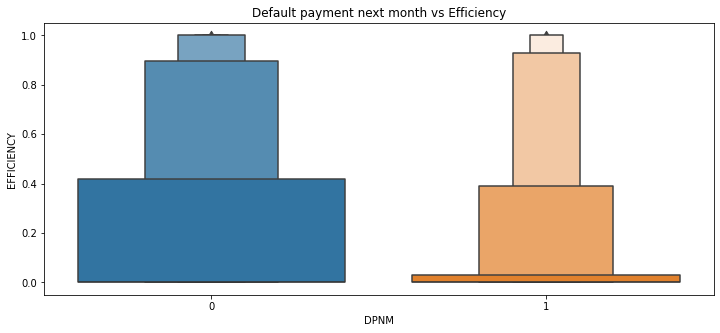

In [23]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxenplot(x ='DPNM', y ='EFFICIENCY', data=df)
plt.title('Default payment next month vs Efficiency')
plt.show()

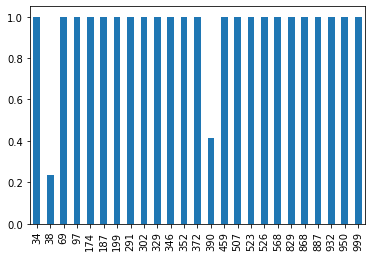

In [36]:
df.loc[df[pays].sum(axis=1) - df[bills].sum(axis=1) > 10000]['EFFICIENCY'].plot(kind='bar')
plt.show()

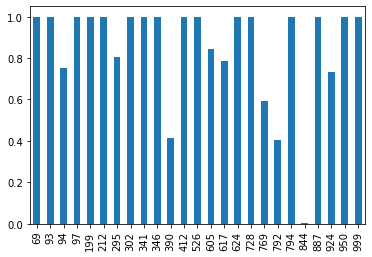

In [37]:
df.loc[df[pays].sum(axis=1)/df[bills].sum(axis=1) > 2]['EFFICIENCY'].plot(kind='bar')
plt.show() 

In [26]:
df["EFF_CAT"] = np.floor(4*df['EFFICIENCY'])

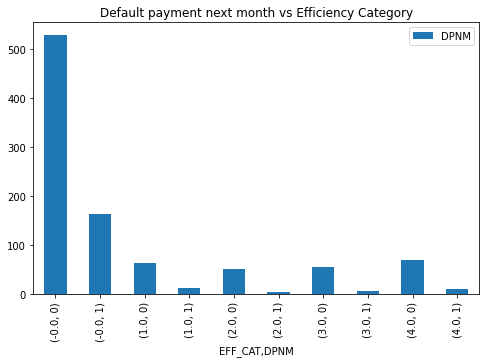

In [27]:
df.groupby(['EFF_CAT'])['DPNM'].value_counts().plot(kind='bar', figsize=(8,5),legend=True)
plt.title('Default payment next month vs Efficiency Category')
plt.show()

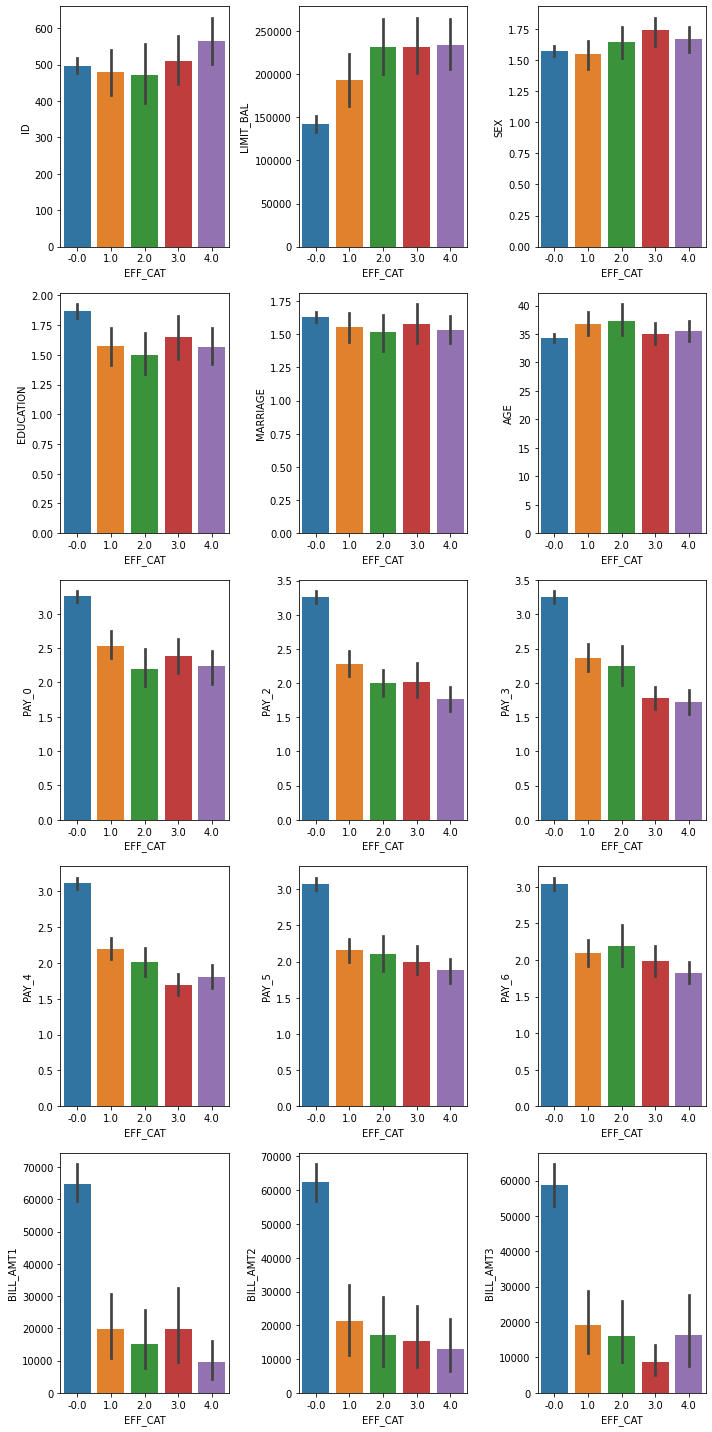

In [28]:
cols = df.columns
rows = 5
columns = 3
f, axes = plt.subplots(rows, columns, figsize=(10, 20))
count = 0
for i in range(rows): # rows loop
    for j in range(columns): # cols loop
        mplot = sns.barplot(x="EFF_CAT", y=cols[count], data=df, ax=axes[i,j])
        count += 1 # to loop over col-names
plt.tight_layout()

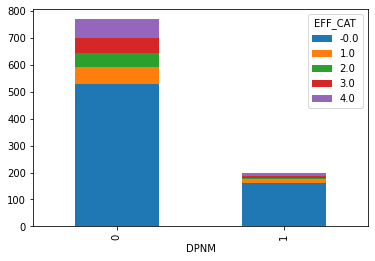

In [29]:
df.groupby(['DPNM','EFF_CAT']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

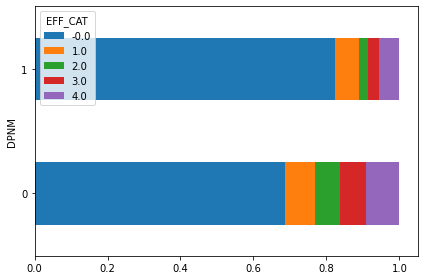

In [30]:
props = df.groupby("DPNM")['EFF_CAT'].value_counts(normalize=True).unstack()
props = props.sort_values(by=1, ascending = False) 
p = props.plot(kind='barh', stacked='True')
plt.tight_layout()